### Create a case study at which you consider the population function f(X) to be nonlinear. You may consider the function to be Y = b_0 + b_1 *sqrt(X) + e. Then perform a train-test validation to chose the optimal choice of K. Compare the pattern of test mse with the situation where f(X) is linear.

In [1]:
%matplotlib inline
import numpy as np
import math
from scipy import stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy.polynomial.polynomial as poly
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

C:\Users\khann\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


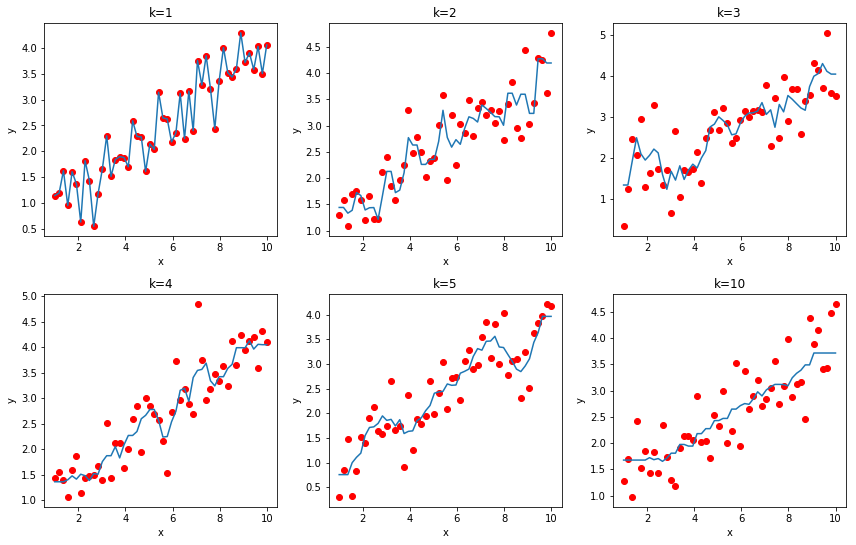

In [2]:
plt.figure(figsize=(12,11))
n=6
for i,n in enumerate([1,2,3,4,5,10]):
    x = np.linspace(1,10,50)
    m=len(x)    
    b0 = 1
    b1 = 0.3
    sigma = 0.5
    y = b0 + b1*x + np.random.normal(0, sigma,m)
    neigh = KNeighborsRegressor(n_neighbors=n)
    neigh.fit(x.reshape(-1,1), y)
    predict=neigh.predict(x.reshape(-1,1)) ## it is predicting x values for each yi
    plt.subplot(3,3,i+1)
    plt.plot(x,y,'ro')
    plt.plot(x, predict)
    plt.title('k=%i'%n)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.tight_layout()
plt.show()

C:\Users\khann\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Users\khann\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


[0.65463344 0.46974153 0.42033117 0.37948389 0.36374829 0.35282842
 0.35811159 0.3685494  0.37804259 0.38770951]


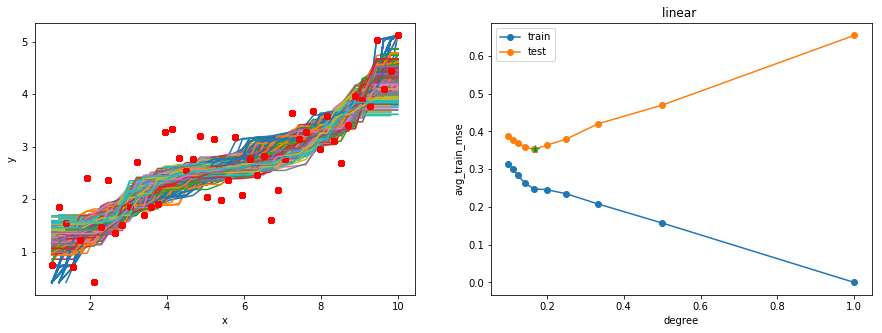

In [10]:
b0=1
b1=0.3
sigma=0.5
np.random.seed(123)
x=np.array(np.linspace(1,10,50))
n=len(x)
y=b0+b1*x+np.random.normal(0,sigma,n)
dt={'y':y,'x':x}
data=pd.DataFrame(dt)
rep=range(1,50)
knn=range(1,11)
plt.figure(figsize=(15,5))
train_mse_knn=np.zeros((len(rep),len(knn)))
test_mse_knn=np.zeros((len(rep),len(knn)))
plt.subplot(1,2,1)
for i in rep:
    train_data,test_data=train_test_split(data,test_size=0.2)
    for k in knn:
        neigh = KNeighborsRegressor(n_neighbors=k)
        x1=train_data.x.reshape(-1,1)
        neigh.fit(x1,train_data.y)
        y_hat=neigh.predict(x1)
        train_mse_knn[i-1][k-1]=mean_squared_error(y_hat,train_data.y)
        plt.plot(x,y,'ro')
        plt.plot(np.sort(train_data.x),np.sort(y_hat))
        plt.xlabel('x')
        plt.ylabel('y')
        x2=test_data.x.reshape(-1,1)
        y_pred=neigh.predict(x2)
        test_mse_knn[i-1][k-1]=mean_squared_error(y_pred,test_data.y)
        
plt.subplot(1,2,2)
avg_tr_ms_knn=train_mse_knn.mean(0)
avg_ts_ms_knn=test_mse_knn.mean(0)
b=min(avg_ts_ms_knn)
degree=np.linspace(1,10,10)
plt.plot(1/degree,avg_tr_ms_knn,'o-',label='train')
plt.plot(1/degree,avg_ts_ms_knn,'o-',label='test')
plt.plot(0.17,b,marker="*",markersize=8,markerfacecolor='g')
plt.xlabel('degree')
plt.ylabel('avg_train_mse')
plt.title('linear ')
plt.legend()
print(avg_ts_ms_knn)


In [11]:
print(avg_ts_ms_knn)
print(b)
np.where(avg_ts_ms_knn == b.min())

## this corresponds for k=4 so k=4 is optimal choice

[0.65463344 0.46974153 0.42033117 0.37948389 0.36374829 0.35282842
 0.35811159 0.3685494  0.37804259 0.38770951]
0.35282841989216324


(array([5], dtype=int64),)

C:\Users\khann\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Users\khann\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


array([0.6492102 , 0.46207849, 0.41412962, 0.37353169, 0.35200771,
       0.3365416 , 0.33781254, 0.34206613, 0.34306925, 0.34637089])

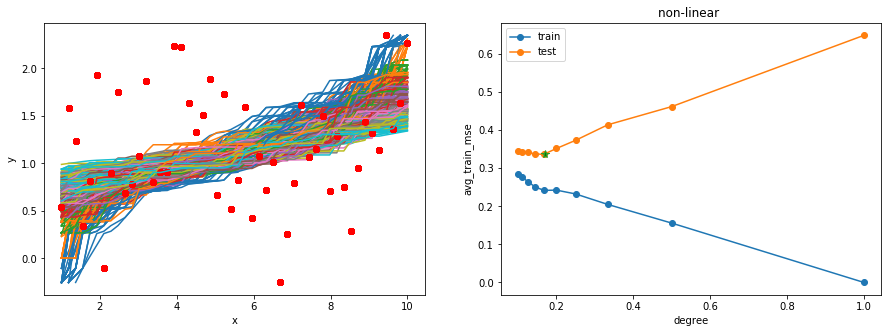

In [12]:
b0=1
b1=1
b2=0.1
sigma=0.5
np.random.seed(123)
x=np.array(np.linspace(1,10,50))
n=len(x)
y = b0 - b1*np.sin(x/60) + b2*np.sqrt(x)+ np.random.normal( 0, sigma,n)
dt={'y':y,'x':x}
data=pd.DataFrame(dt)
rep=range(1,50)
knn=range(1,11)
plt.figure(figsize=(15,5))
train_mse_knn=np.zeros((len(rep),len(knn)))
test_mse_knn=np.zeros((len(rep),len(knn)))
plt.subplot(1,2,1)
for i in rep:
    train_data,test_data=train_test_split(data,test_size=0.2)
    for k in knn:
        neigh = KNeighborsRegressor(n_neighbors=k)
        x1=train_data.x.reshape(-1,1)
        neigh.fit(x1,train_data.y)
        y_hat=neigh.predict(x1)
        train_mse_knn[i-1][k-1]=mean_squared_error(y_hat,train_data.y)
        plt.plot(x,y,'ro')
        plt.plot(np.sort(train_data.x),np.sort(y_hat))
        plt.xlabel('x')
        plt.ylabel('y')
        x2=test_data.x.reshape(-1,1)
        y_pred=neigh.predict(x2)
        test_mse_knn[i-1][k-1]=mean_squared_error(y_pred,test_data.y)
        
plt.subplot(1,2,2)
avg_tr1_ms_knn=train_mse_knn.mean(0)
avg_ts1_ms_knn=test_mse_knn.mean(0)
a=min(avg_ts1_ms_knn)
degree=np.linspace(1,10,10)
plt.plot(1/degree,avg_tr1_ms_knn,'o-',label='train')
plt.plot(1/degree,avg_ts1_ms_knn,'-o',label='test')
plt.plot(0.17,a,marker="*",markersize=8,markerfacecolor='g')
plt.xlabel('degree')
plt.ylabel('avg_train_mse')
plt.title('non-linear ')
plt.legend()
avg_ts1_ms_knn

In [13]:
np.where(avg_ts1_ms_knn == a.min())

## here k=6 corresponds to optimal k value
##the test mse for non linear model is less 
##  KNN performs slightly worse than linear regression 
## when the relationship is linear, but much better than linear regression for non-linear situations.

(array([5], dtype=int64),)

C:\Users\khann\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Users\khann\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


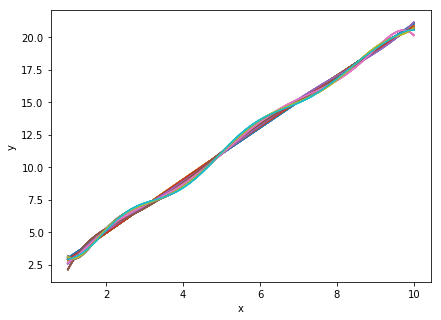

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
np.random.seed(123)
b0= 1
b1= 2
sigma=0.8
x =np.array(np.linspace(1, 10, 100)) 
n=len(x)
y = b0+b1*x + np.random.normal( 0, sigma,n)
d={'y':y,'x':x}
data=pd.DataFrame(d)
rep=range(1,10)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
# for plotting the polynomials of different degrees
for i in rep:
    train_data,test_data=train_test_split(data,test_size=0.2)
    for deg in range(1, 11):
        coefs = poly.polyfit(x, y, deg)
        ffit = poly.polyval(x, coefs)
        plt.plot(x,ffit)
        plt.xlabel('x')
        plt.ylabel('y')

deg=range(1,11)        
train_mse=np.zeros((len(rep),len(deg)))
test_mse=np.zeros((len(rep),len(deg)))
for i in rep:
    train_data,test_data=train_test_split(data,test_size=0.2)
    for d in deg:
        # Training Polynomial Regression Model
        x_tr = PolynomialFeatures(degree=d,include_bias=False).fit_transform(train_data.x.reshape(-1,1))
        x_ts = PolynomialFeatures(degree=d,include_bias=False).fit_transform(test_data.x.reshape(-1,1))
        model = LinearRegression(fit_intercept=True).fit(x_tr,train_data.y)
        # Predict Result with Polynomial Regression
        tr_pred= model.predict(x_tr)
        ts_pred=model.predict(x_ts)
        train_mse[i-1][d-1]=mean_squared_error(tr_pred,train_data.y)
        test_mse[i-1][d-1]=mean_squared_error(ts_pred,test_data.y)


No handles with labels found to put in legend.


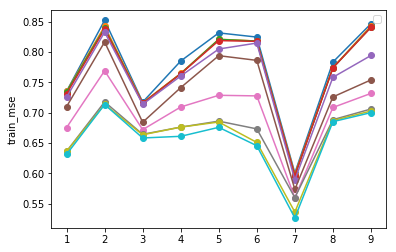

In [15]:
degree=np.linspace(1,9,9)
for i in range(0,10):
    plt.plot(degree,train_mse[:,i],'o-')
plt.ylabel('train_mse')
plt.legend()    

<function matplotlib.pyplot.legend>

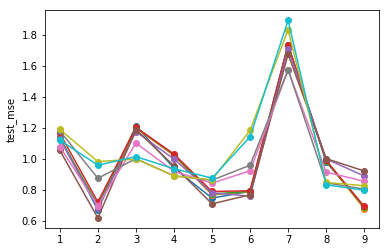

In [16]:
for i in range(0,10):
    plt.plot(degree,test_mse[:,i],'o-',label='test')
plt.ylabel('test_mse')
plt.legend